# Correction CC2 décembre 2025

Les codes sont proposés, la partie à rédiger a été discuté en cours. Il est important de rédiger les éléments théoriques du cours avant de se lancer dans la programmation.

## PRoblème au limite 1D


In [25]:
# calcul formel pour fabriquer une solution exacte
import sympy as sy
x_sym = sy.symbols('x')
uex_sym = sy.sin(x_sym)*(x_sym-2)
duex_sym = sy.diff(uex_sym, x_sym)
d2uex_sym = sy.diff(duex_sym, x_sym)
f_sym = -d2uex_sym + 0*duex_sym
print(f_sym)
f_sym = -d2uex_sym + 3*duex_sym
print(f_sym)

(x - 2)*sin(x) - 2*cos(x)
(x - 2)*sin(x) + 3*(x - 2)*cos(x) + 3*sin(x) - 2*cos(x)


Max error: 3.173223762098498e-05


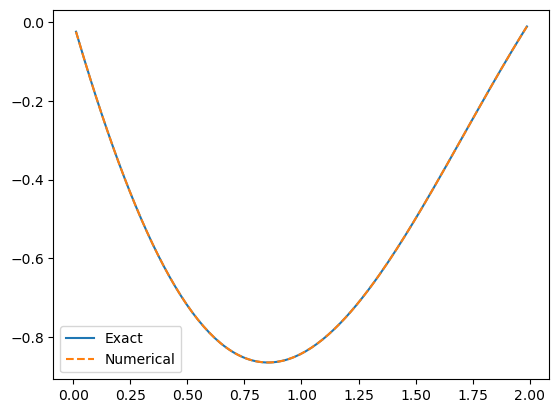

In [ ]:
#cas c=3
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags

L=2.0
N=160
h=L/(N+1)
c=3.0
x=np.linspace(h,L-h,N)

D0=2.0/h**2*np.ones(N)
D1=(-1/h**2+0.5*c/h)*np.ones(N)
Dm1=(-1/h**2-0.5*c/h)*np.ones(N)

A=spdiags([Dm1,D0,D1],[-1,0,1],N,N).tocsr()
def uex(x):
    return np.sin(x)*(x-2)
def f(x):
    return (x - 2)*np.sin(x) + 3*(x - 2)*np.cos(x) + 3*np.sin(x) - 2*np.cos(x)

u=spsolve(A,f(x))
plt.plot(x,uex(x),label='Exact')
plt.plot(x,u,'--',label='Numerical')
plt.legend()
print("Max error:",np.max(np.abs(u-uex(x))))



Max error (spectral): 3.717066958922738e-05
Max error: 3.717066958922738e-05


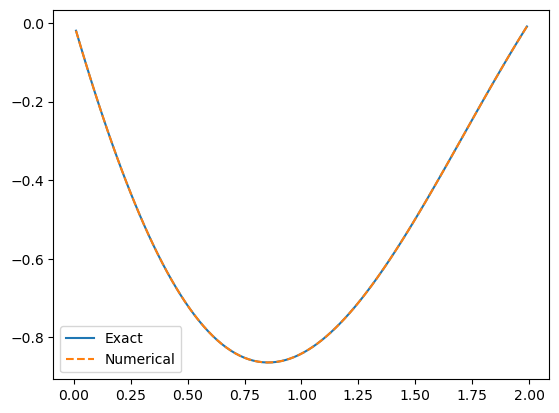

In [ ]:
from scipy.fftpack import dst, idst
def f(x):
    return (x - 2)*np.sin(x) - 2*np.cos(x)
N=100

def erreur(N):
    L=2.0
    h=L/N
    x=np.linspace(h/2,L-h/2,N)
    F=f(x)
    Fchap=dst(F)
    lam=(np.arange(1,N+1)*np.pi/L)**2  
    Uchap=Fchap/lam 
    u= idst(Uchap)/ (2*N)
    return np.max(np.abs(u-uex(x))),x,u,uex(x)
err,x,U,uex_vals=erreur(N)
print("Max error (spectral):",err)
plt.plot(x,uex_vals,label='Exact')
plt.plot(x,U,'--',label='Numerical')
plt.legend()



l'ordre de la méthode en h est : 1.996754994799004


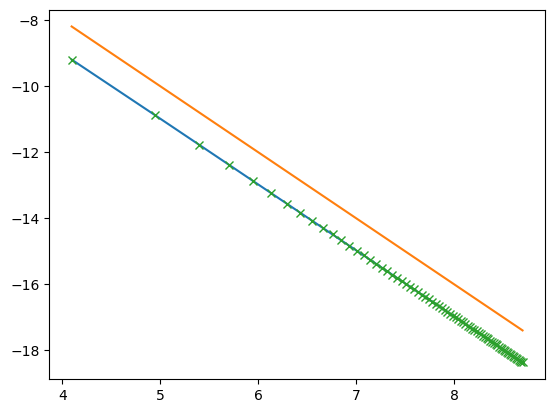

In [13]:
# calcul de l'ordre de convergence
Ntab=[]
errtab=[]
for N in range(60,6000,80):
    Ntab.append(N)
    err,x,U,uex_vals=erreur(N)
    errtab.append(err)
plt.plot(np.log(Ntab),np.log(errtab),np.log(Ntab),-2*np.log(Ntab))
plt.plot(np.log(Ntab),np.log(errtab),'x')
print("l'ordre de la méthode en h est :",-np.   polyfit(np.log(Ntab),np.log(errtab), 1)[0])

## Problème aux limites 2D
On choisit ici une solution exacte au problème 2D
$$
\begin{cases}
-\Delta u  = f & \text{dans } \Omega = (0,2)^2 \\
u = 0 & \text{sur } \partial \Omega
\end{cases}
$$
La foncttion suivante satsfait les conditions aux limites:
$$
u_{ex}(x,y) = \sin(\pi x/2)(x-2)\sin(\pi y/2)(y-2)
$$
On calcule $f$ en utilisant le calcul formel (sympy).

In [29]:
import sympy as sy
x_sym,y_sym = sy.symbols('x y',real=True)
uex_sym = sy.sin(x_sym)*(x_sym-2)*sy.sin(y_sym)*(y_sym-2)
duex_sym_x = sy.diff(uex_sym, x_sym)
duex_sym_y = sy.diff(uex_sym, y_sym)
d2uex_sym_x = sy.diff(duex_sym_x, x_sym)
d2uex_sym_y = sy.diff(duex_sym_y, y_sym)
f_sym = -d2uex_sym_x - d2uex_sym_y
print(f_sym)
U2dex=sy.lambdify((x_sym,y_sym),uex_sym)
F2df=sy.lambdify((x_sym,y_sym),f_sym)


2*(x - 2)*(y - 2)*sin(x)*sin(y) - 2*(x - 2)*sin(x)*cos(y) - 2*(y - 2)*sin(y)*cos(x)


Max error 2D (spectral): 4.8840810645017774e-05


Text(0.5, 1.0, 'Numerical solution 2D')

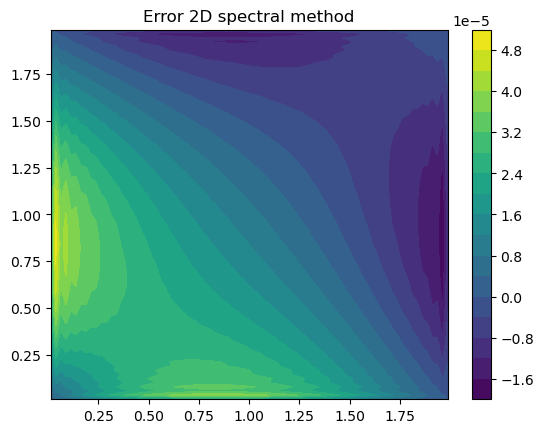

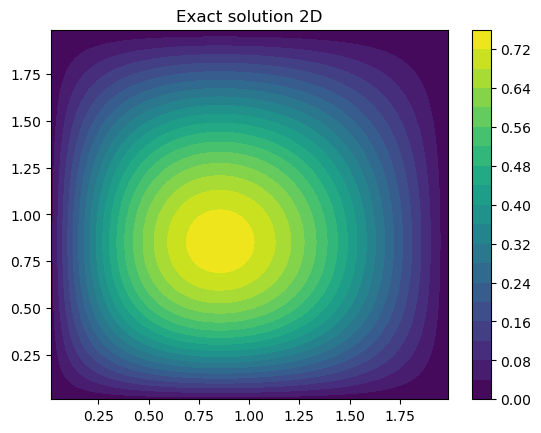

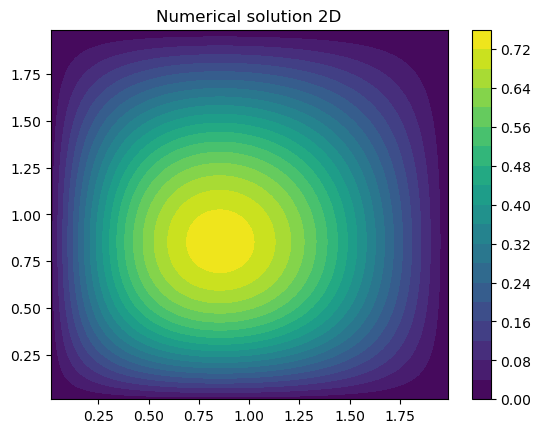

In [32]:
from scipy.fftpack import dstn, idstn
L=2.0
Nx=80
Ny=90
dx=L/Nx
dy=L/Ny
#discrétisation en x et y du domaine
x=np.linspace(dx/2,L-dx/2,Nx)
y=np.linspace(dy/2,L-dy/2,Ny)
X,Y=np.meshgrid(x,y)
F=F2df(X,Y)
#valeurs propres
kx=np.arange(1,Nx+1)*np.pi/L
ky=np.arange(1,Ny+1)*np.pi/L
KX, KY = np.meshgrid(kx, ky)
lam=KX**2 + KY**2


Uchap=dstn(F)/lam
Uapp= idstn(Uchap)/((2*Nx)*(2*Ny))
Uex=U2dex(X,Y)
print("Max error 2D (spectral):",np.max(np.abs(Uapp-Uex)))
plt.figure()
plt.contourf(X,Y,Uapp-Uex,20)
plt.colorbar()
plt.title('Error 2D spectral method')
#plot de la solution exacte et approchée
plt.figure()
plt.contourf(X,Y,Uex,20)
plt.colorbar()
plt.title('Exact solution 2D')
plt.figure()
plt.contourf(X,Y,Uapp,20)
plt.colorbar()
plt.title('Numerical solution 2D')


### Problème d'évolution


Max error: 0.002118647670229967
Max erreur relative: 0.005457430017042127


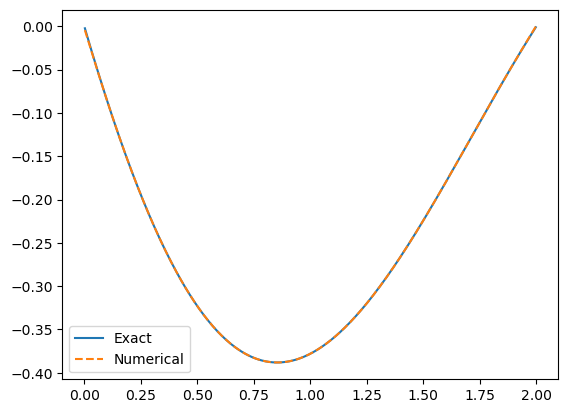

In [23]:
def f0(x):
    return (x - 2)*np.sin(x) - 2*np.cos(x)
def uex0(x):
    return np.sin(x)*(x-2)
def f(t,x):
    return np.exp(-t)*(f0(x)-uex0(x))
def uex(t,x):
    return np.exp(-t)*uex0(x)

L=2.0
T=0.8
N=400
h=L/N
dt=h
x=np.linspace(h/2,L-h/2,N)
lam=(np.arange(1,N+1)*np.pi/L)**2  
U=uex0(x) # condi initiale
Uchap=dst(U)
nt=int(T/dt)
T=dt*nt# ajustement de T
for it in range(nt):
    Fg=f(it*dt,x)
    Fd=f((it+1)*dt,x)
    Fgchap=dst(Fg)
    Fdchap=dst(Fd)
    
    Uchap=Uchap*np.exp(-dt*lam) + dt* (Fgchap*np.exp(-dt*lam) + Fdchap)/(2)
    
U= idst(Uchap)/ (2*N)
plt.plot(x,uex(T,x),label='Exact')
plt.plot(x,U,'--',label='Numerical')
plt.legend()
print("Max error:",np.max(np.abs(U-uex(T,x))))
print("Max erreur relative:",np.max(np.abs(U-uex(T,x)))/np.max(np.abs(uex(T,x))))
#pour prouver la convergence, on  prend dt=dx et on constate l'ordre 1 à l'aide de différentes taille de N, 
# puis on prend dt=dx**2 et on constate l'ordre 2 à l'aide de différentes taille de N.
#...